<a href="https://colab.research.google.com/github/LaurentTits/AI_execices/blob/main/XAI_Gradcam_classification_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Intaller le module d'explicabilité "tf-explain"**

In [1]:
!pip install tf-explain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 1.9 MB/s 


#**2. Importer les libraries**

In [5]:
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import tf_explain
from tf_explain.core.grad_cam import GradCAM
from tf_explain.core.smoothgrad import SmoothGrad
from keras.models import load_model
import cv2
from google.colab import files, drive

#**3. Charger la base d'images de test**

In [6]:
!rm -rf sample_data
!wget --no-check-certificate https://download.smartappli.eu/test.tar
! tar xf test.tar --one-top-level
! rm test.tar

--2022-11-02 07:48:43--  https://download.smartappli.eu/test.tar
Resolving download.smartappli.eu (download.smartappli.eu)... 46.105.57.169, 2001:41d0:301::20
Connecting to download.smartappli.eu (download.smartappli.eu)|46.105.57.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58196992 (56M) [application/x-tar]
Saving to: ‘test.tar’

test.tar            100%[===================>]  55.50M  24.1MB/s    in 2.3s    

2022-11-02 07:48:46 (24.1 MB/s) - ‘test.tar’ saved [58196992/58196992]



#**4. Charger le modèle**

In [7]:
files.upload()

{}

In [8]:
from google.colab import files, drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
classes_path = "/content/gdrive/MyDrive/classes.txt"
# Récupérer les noms des classes
with open(classes_path, 'r') as f:
    classes = f.readlines()
    classes = list(map(lambda x: x.strip(), classes))
num_classes = len(classes)

In [11]:
# Load pretrained model or your own
# model = load_model("Fire_Model_Small_ResNet50.h5")
model = load_model('/content/gdrive/MyDrive/model_db3_ep4_valloss0.111.h5')

In [12]:
input_dim =299

#**5. Définir la classes à expliquer**

In [13]:
className="fire"
!mkdir -p className/className

#**6. Sélectionner 3 images de test**

In [20]:
images_to_test = ["test/Test_Dataset/fire/test002.jpg",
                  "test/Test_Dataset/fire/test005.jpg",
                  "test/Test_Dataset/fire/test013.jpg",
                  "test/Test_Dataset/start_fire/test101.jpg",
                  "test/Test_Dataset/no_fire/test201.jpg",
]

#**4. Expliquer le modèle avec la méthode XAI "GradCAM"**

test/Test_Dataset/fire/test002.jpg
1/1 [==============================] - 0s 347ms/step


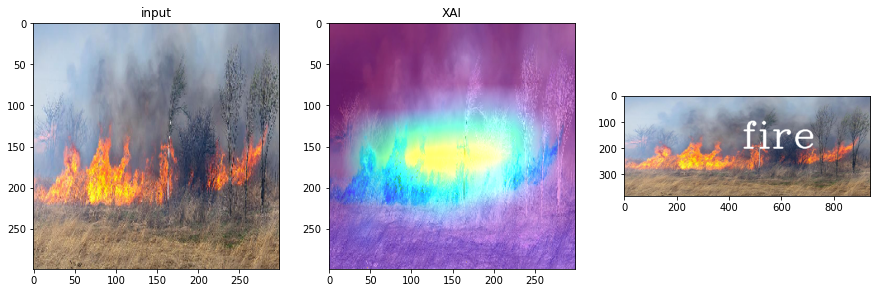

test/Test_Dataset/fire/test005.jpg
1/1 [==============================] - 0s 334ms/step


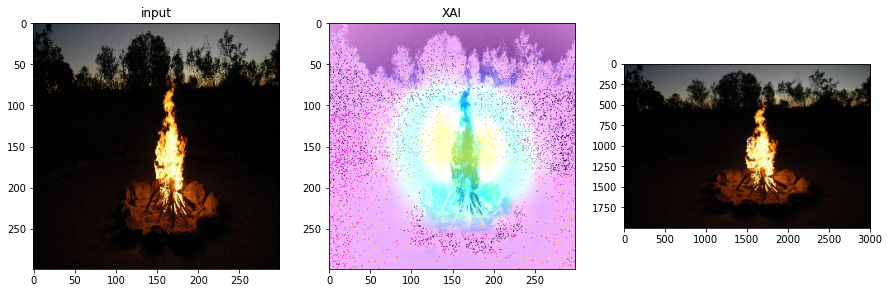

test/Test_Dataset/fire/test013.jpg
1/1 [==============================] - 0s 344ms/step


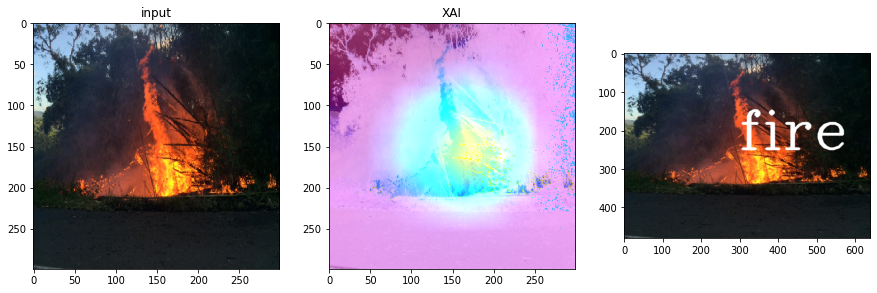

test/Test_Dataset/start_fire/test101.jpg
1/1 [==============================] - 0s 347ms/step


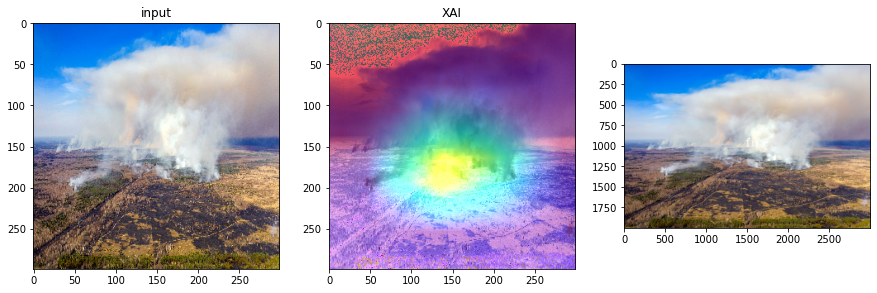

test/Test_Dataset/no_fire/test201.jpg
1/1 [==============================] - 0s 334ms/step


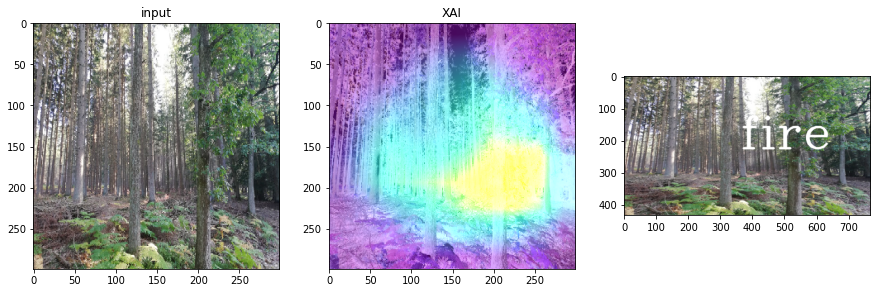

In [21]:
for image_path in images_to_test:
    #imnum=[]
    print(image_path)
    # Load to the correct format and predict the current image
    img0 = tf.keras.preprocessing.image.load_img(image_path, target_size=(input_dim,input_dim))
    img = tf.keras.preprocessing.image.img_to_array(img0)

    data = ([img], None)
    xy=np.expand_dims(img,axis=0)
    myTuple=(xy,None)

    # Start explainer
    #explainer = SmoothGrad()
    explainer = GradCAM()
    grid = explainer.explain(myTuple, model, class_index=1)
    temp = np.concatenate((img,grid),axis=1)
    fig, axs = plt.subplots(1, 3)
    axs[0].imshow(img.astype(np.uint8))
    axs[0].set_title("input")
    axs[1].imshow(grid.astype(np.uint8))
    axs[1].set_title("XAI")

    fig.set_figheight(15)
    fig.set_figwidth(15)


    pred = model.predict(xy,batch_size=1)[0]
    for (pos,prob) in enumerate(pred):
      pos == np.argmax(pred)

      img = cv2.imread(image_path)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      font = cv2.FONT_HERSHEY_COMPLEX 
      textsize = cv2.getTextSize(className, font, 0.7, 2)[0]
      textX = (img.shape[1] - textsize[0]) / 2
      textY = (img.shape[0] + textsize[1]) / 2
      cv2.putText(img, "fire", (int(textX), int(textY)), font, 4.7, (255,255,255), 5, cv2.LINE_AA)
      axs[2].imshow(img)
    plt.show()